In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2019-09-01 12:26:00 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


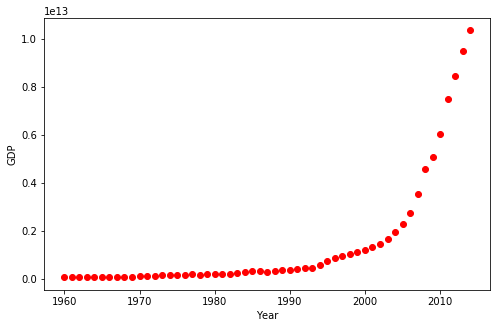

In [0]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [0]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

In [0]:
def exponential(x):
  y = np.exp(x)
  return y

In [0]:
xdata= x_data/max(x_data)
ydata= y_data/max(y_data)

In [0]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(popt)
print(pcov)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

[690.45301712   0.99720713]
[[ 1.52273887e+03 -2.88115957e-04]
 [-2.88115957e-04  7.25956452e-09]]
 beta_1 = 690.453017, beta_2 = 0.997207


In [0]:
x = np.linspace(1960, 2015, 55)
print(x)
x = x/max(x)
print(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(xdata,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [0]:
msk= np.random.rand(len(df)) < 0.8
train_x= xdata[msk]
test_x = xdata[~msk]

train_y= ydata[msk]
test_y = ydata[~msk]

popt , pcov = curve_fit(sigmoid, train_x, train_y)

print(popt , pcov)

[83.3790541   1.35627587] [[inf inf]
 [inf inf]]


/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [0]:
y_pred = sigmoid(test_x,*popt)

print('Mean Absolute Error %.2lf' % np.mean(np.absolute(test_y - y_pred)))
print('Mean Squared Error %.2lf' % np.mean((y_pred - test_y)**2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_pred , test_y) )

Mean Absolute Error 0.20
Mean Squared Error 0.10
R2-score: -79760536603194827451924480.00
